# Box Office Mojo EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/kibbles/anaconda3/envs/metis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Import data and inspect

In [2]:
path=('./data/mojo_all_years_movies_cleaned.pkl')
df = pd.read_pickle(path)
df

Movie_Title          Domestic_Distributor  \
0                    Inside the Rain              Sky Island Films   
1                           The Hunt            Universal Pictures   
2      Never Rarely Sometimes Always                Focus Features   
3                          Moondance                                 
4                The Roads Not Taken         Bleecker Street Media   
...                              ...                           ...   
15968                   Modern Times                United Artists   
15969                              M  Foremco Pictures Corporation   
15970                    City Lights                United Artists   
15971                     Metropolis            Paramount Pictures   
15972    The Cabinet of Dr. Caligari  Goldwyn Distributing Company   

       Domestic_Total_Gross  Runtime Rating Release_Date      Budget  \
0                      8140     90.0    NaN   2020-03-13         NaN   
1                   5812500     90.0      R   2020-03-13  14000000.0   
2                     16565    101.0  PG-13   2020-03-13         NaN   
3                      2371     97.0    NaN   2020-03-13         NaN   
4                      3518     85.0      R   2020-03-13         NaN   
...                     ...      ...    ...          ...         ...   
15968                163577     87.0    NaN   1936-02-05         NaN   
15969                 35566    117.0    NaN   1933-03-31         NaN   
15970                 19181     87.0      G   1931-01-30         NaN   
15971               1236166    153.0    NaN   1927-05-06         NaN   
15972                  8811     76.0    NaN   1921-03-19         NaN   

                 Cast1              Cast2               Cast3  ...  \
0          Rosie Perez       Eric Roberts        Aaron Fisher  ...   
1         Betty Gilpin       Hilary Swank      Ike Barinholtz  ...   
2      Eliazar Jimenez       David Buneta  Christian Clements  ...   
3         Adam Conover   Cooper Flannigan           Sam Jones  ...   
4        Javier Bardem       Elle Fanning         Salma Hayek  ...   
...                ...                ...                 ...  ...   
15968  Charles Chaplin   Paulette Goddard       Henry Bergman  ...   
15969      Peter Lorre      Ellen Widmann        Inge Landgut  ...   
15970  Charles Chaplin  Virginia Cherrill        Florence Lee  ...   
15971    Brigitte Helm        Alfred Abel     Gustav Fröhlich  ...   
15972    Werner Krauss       Conrad Veidt     Friedrich Feher  ...   

      Writer_Score Producer_Score Cinematographer_Score  \
0              NaN       8.737934                   NaN   
1              NaN      17.145732                   NaN   
2        12.444278            NaN             11.191300   
3              NaN            NaN                   NaN   
4        13.689267      13.892649             12.623175   
...            ...            ...                   ...   
15968     9.861675            NaN                   NaN   
15969    14.027525            NaN                   NaN   
15970          NaN            NaN                   NaN   
15971          NaN            NaN                   NaN   
15972          NaN            NaN                   NaN   

      Domestic_Distributor_Score Cast1_Score  Cast2_Score  Cast3_Score  \
0                      11.629045   11.063877    14.496685          NaN   
1                      17.263232         NaN    16.003221    17.915033   
2                      16.093152         NaN          NaN          NaN   
3                       9.879297         NaN          NaN          NaN   
4                      14.988554   14.622493    15.549776    13.479712   
...                          ...         ...          ...          ...   
15968                   9.861675    9.861675          NaN          NaN   
15969                        NaN         NaN          NaN          NaN   
15970                        NaN         NaN          NaN          NaN   
15971                        

In [3]:
df.describe()

Domestic_Total_Gross       Runtime        Budget  Intercept  \
count          1.597300e+04  15560.000000  3.331000e+03    15973.0   
mean           1.812206e+07    104.641324  4.546919e+07        1.0   
std            4.731340e+07     23.212232  4.675174e+07        0.0   
min            7.200000e+01     61.000000  2.200000e+02        1.0   
25%            5.145600e+04     91.000000  1.350000e+07        1.0   
50%            6.946000e+05    100.000000  3.000000e+07        1.0   
75%            1.419523e+07    112.000000  6.000000e+07        1.0   
max            9.366622e+08    808.000000  3.560000e+08        1.0   

       Profit_percent             G         NC-17     Not Rated            PG  \
count     3331.000000  15973.000000  15973.000000  15973.000000  15973.000000   
mean         5.060121      0.005822      0.001377      0.002442      0.079947   
std        139.289844      0.076084      0.037088      0.049354      0.271220   
min         -0.999926      0.000000      0.000000      0.000000      0.000000   
25%         -0.506871      0.000000      0.000000      0.000000      0.000000   
50%          0.075138      0.000000      0.000000      0.000000      0.000000   
75%          1.137217      0.000000      0.000000      0.000000      0.000000   
max       7193.587333      1.000000      1.000000      1.000000      1.000000   

              PG-13  ...  Writer_Score  Producer_Score  Cinematographer_Score  \
count  15973.000000  ...   5238.000000     7140.000000           10086.000000   
mean       0.170100  ...     15.099382       15.090492              14.560771   
std        0.375732  ...      2.714284        2.668587               2.546893   
min        0.000000  ...      4.276666        4.276666               4.276666   
25%        0.000000  ...     13.146927       13.157453              12.715384   
50%        0.000000  ...     15.801276       15.841217              15.260408   
75%        0.000000  ...     17.270198       17.221974              16.617608   
max        1.000000  ...     19.948905       20.092487              19.926202   

       Domestic_Distributor_Score  Cast1_Score  Cast2_Score  Cast3_Score  \
count                14541.000000  7963.000000  6475.000000  5139.000000   
mean                    13.848027    15.451323    15.502373    15.638903   
std                      2.631391     2.366087     2.350236     2.415252   
min                      6.559615     5.752573     5.575949     6.086775   
25%                     11.462989    13.978876    14.210249    14.414978   
50%                     13.923847    16.168995    16.202600    16.334355   
75%                     16.530316    17.225805    17.178859    17.347907   
max                     19.035464    20.657833    20.657833    20.098215   

       Cast4_Score       Log_DTG      Log_Bud  
count  4006.000000  15973.000000  3331.000000  
mean     15.579819     13.537541    17.020257  
std       2.507880      3.228295     1.400118  
min       4.276666      4.276666     5.393628  
25%      14.320168     10.848482    16.418200  
50%      16.334215     13.451091    17.216708  
75%      17.401751     16.468416    17.909855  
max      20.657833     20.657833    19.690441  

[8 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15973 entries, 0 to 15972
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Movie_Title                 15973 non-null  object        
 1   Domestic_Distributor        15623 non-null  object        
 2   Domestic_Total_Gross        15973 non-null  int64         
 3   Runtime                     15560 non-null  float64       
 4   Rating                      8964 non-null   object        
 5   Release_Date                15973 non-null  datetime64[ns]
 6   Budget                      3331 non-null   float64       
 7   Cast1                       15691 non-null  object        
 8   Cast2                       15536 non-null  object        
 9   Cast3                       15422 non-null  object        
 10  Cast4                       15300 non-null  object        
 11  Director                    15684 non-null  object    

# Examine films with budgets (WIP)

In [5]:
subset = ['Domestic_Total_Gross','Director_Score','Budget','Runtime']
df.dropna(subset=subset)

Movie_Title                 Domestic_Distributor  \
1                   The Hunt                   Universal Pictures   
29         The Invisible Man                   Universal Pictures   
39        Brahms: The Boy II                    STX Entertainment   
50            The Photograph                   Universal Pictures   
54            Fantasy Island              Sony Pictures Releasing   
...                      ...                                  ...   
15921  2001: A Space Odyssey            Metro-Goldwyn-Mayer (MGM)   
15926           My Fair Lady                         Warner Bros.   
15927        Dr. Strangelove                    Columbia Pictures   
15945     Lady and the Tramp  Walt Disney Studios Motion Pictures   
15949              Peter Pan  Walt Disney Studios Motion Pictures   

       Domestic_Total_Gross  Runtime Rating Release_Date      Budget  \
1                   5812500     90.0      R   2020-03-13  14000000.0   
29                 64914050    124.0      R   2020-02-26   7000000.0   
39                 12611536     86.0  PG-13   2020-02-20  10000000.0   
50                 20578185    106.0  PG-13   2020-02-14  16000000.0   
54                 26441782    109.0  PG-13   2020-02-12   7000000.0   
...                     ...      ...    ...          ...         ...   
15921              60541301    149.0    NaN   1968-04-03  12000000.0   
15926              72560711    170.0      G   1964-10-21  17000000.0   
15927               9440272     95.0     PG   1964-01-29   1800000.0   
15945              93602326     76.0      G   1955-06-22   4000000.0   
15949              87404651     77.0      G   1953-02-05   4000000.0   

                   Cast1                 Cast2                Cast3  ...  \
1           Betty Gilpin          Hilary Swank       Ike Barinholtz  ...   
29        Elisabeth Moss  Oliver Jackson-Cohen         Harriet Dyer  ...   
39          Katie Holmes          Owain Yeoman  Christopher Convery  ...   
50     LaKeith Stanfield       Chelsea Peretti    Courtney B. Vance  ...   
54          Michael Peña              Maggie Q            Lucy Hale  ...   
...                  ...                   ...                  ...  ...   
15921        Keir Dullea         Gary Lockwood    William Sylvester  ...   
15926     Audrey Hepburn          Rex Harrison     Stanley Holloway  ...   
15927      Peter Sellers       George C. Scott      Sterling Hayden  ...   
15945      Barbara Luddy         Larry Roberts            Peggy Lee  ...   
15949     Bobby Driscoll      Kathryn Beaumont         Hans Conried  ...   

      Writer_Score Producer_Score Cinematographer_Score  \
1              NaN      17.145732                   NaN   
29       17.822930      17.138420             15.606069   
39       17.394005      16.951552             17.268570   
50             NaN      17.815762              9.873131   
54             NaN      17.145732             17.752465   
...            ...            ...                   ...   
15921    16.060495      16.060495                   NaN   
15926    12.498085            NaN                   NaN   
15927          NaN            NaN                   NaN   
15945          NaN            NaN                   NaN   
15949          NaN            NaN                   NaN   

      Domestic_Distributor_Score Cast1_Score  Cast2_Score  Cast3_Score  \
1                      17.263232         NaN    16.003221    17.915033   
29                     17.261488   11.421008          NaN          NaN   
39                     17.114334   14.743202          NaN          NaN   
50                     17.263232   15.997715          NaN    17.688851   
54                     17.264985   16.307544          NaN          NaN   
...                          ...         ...          ...          ...   
15921                  16.403889         NaN          NaN          NaN   
15926                  12.205888         NaN          NaN          NaN   
15927                  12.671845   

# Examine Data

## Pairplot

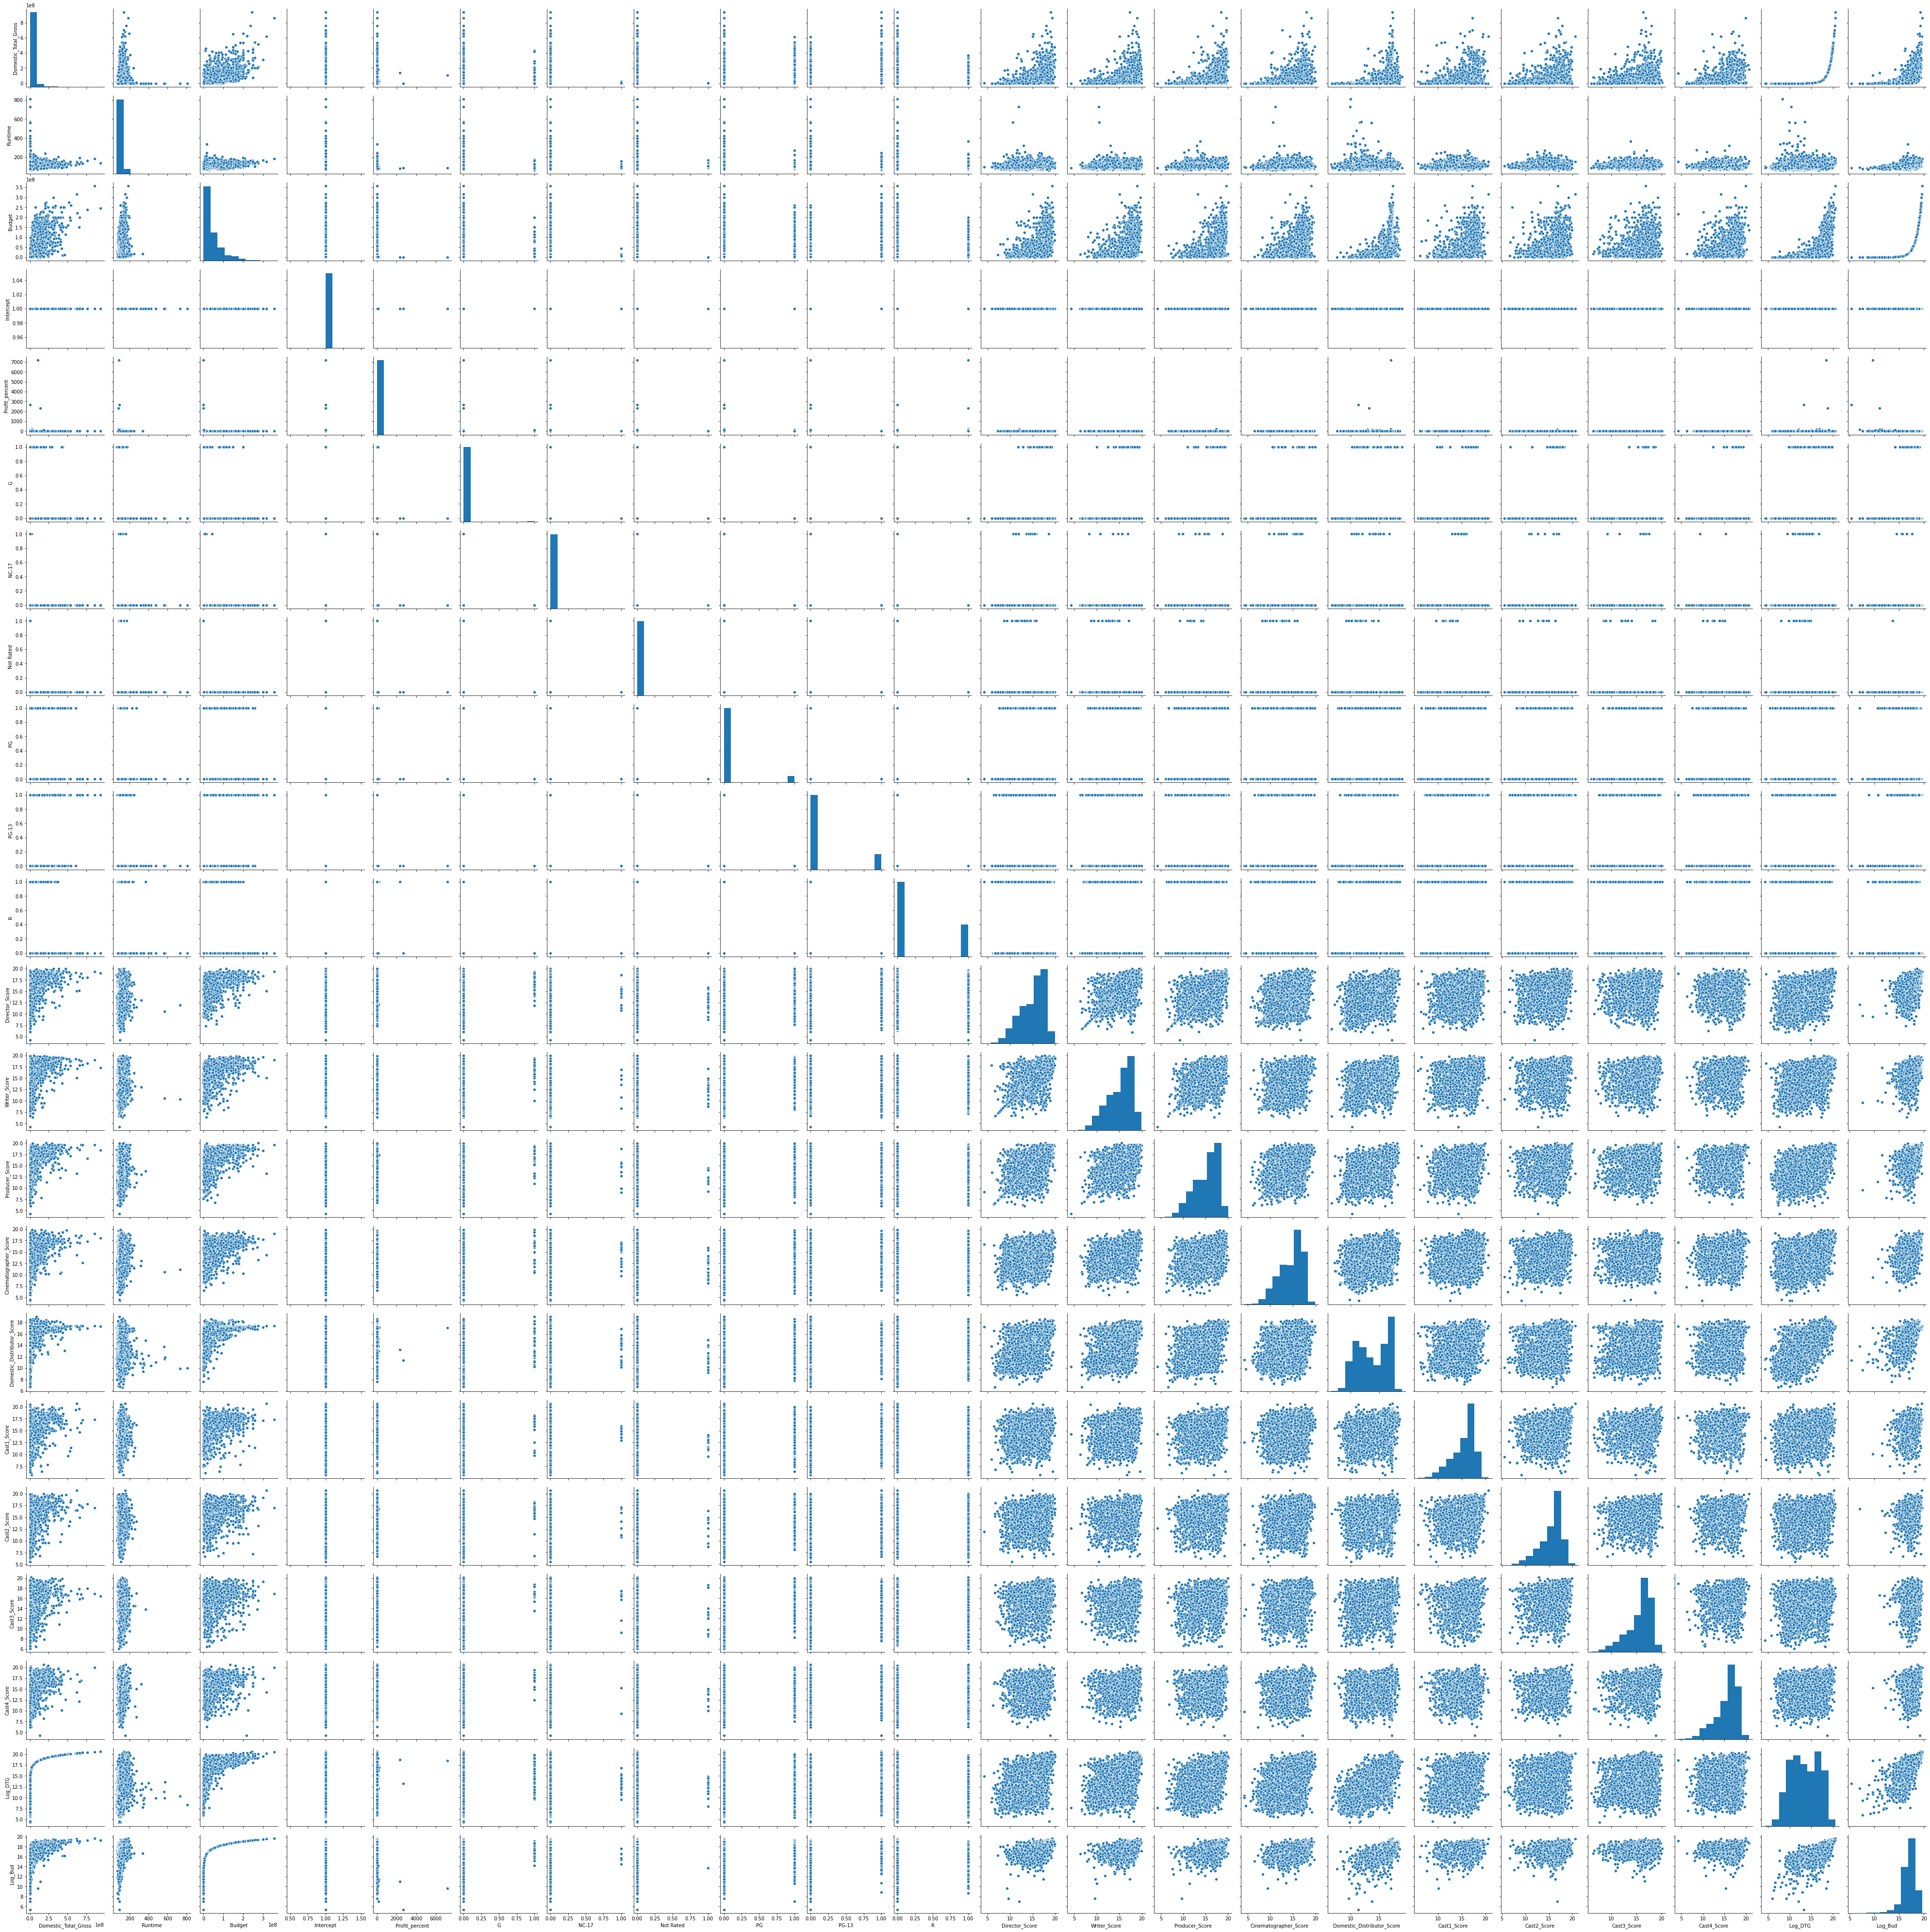

In [6]:
# TODO: remove ratings

#sns.pairplot(df)

## score

In [182]:
df.groupby(['Director'])['Director_Score'].mean().reset_index().sort_values(['Director_Score'], ascending=False)

Director  Director_Score
2531       George Lucas       19.953767
4368        Lee Unkrich       19.843801
7239         Tim Miller       19.710108
4273         Kyle Balda       19.632758
6321       Roger Allers       19.607499
...                 ...             ...
7781   Éléonore Faucher             NaN
7783       Éric Heumann             NaN
7785       Éric Tessier             NaN
7786  Étienne Chatiliez             NaN
7787         Éva Gárdos             NaN

[7788 rows x 2 columns]

## Distributor

### Distributors by movie count

In [7]:
df['Domestic_Distributor'].value_counts().reset_index(drop=False).set_index('index')

Domestic_Distributor
index                                                    
Warner Bros.                                          844
Universal Pictures                                    663
Twentieth Century Fox                                 581
Walt Disney Studios Motion Pictures                   578
Paramount Pictures                                    510
...                                                   ...
Anywhere Road Entertainment                             1
Hollywood Global Studios                                1
Cho                                                     1
Branded/Peck Entertainment                              1
Novus                                                   1

[1082 rows x 1 columns]

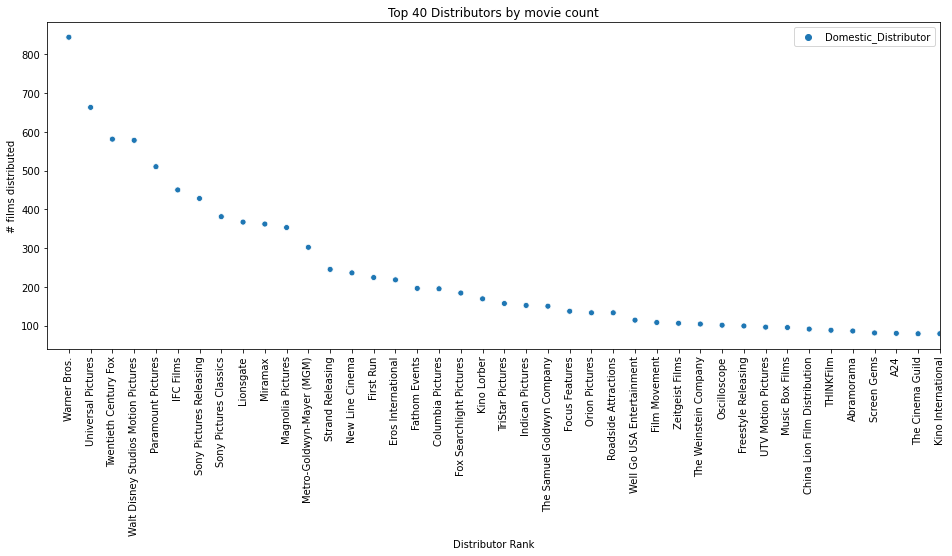

In [8]:
points = df['Domestic_Distributor'].value_counts().reset_index(drop=False).loc[:40]
plt.figure(figsize=(16,6))

ploot = sns.scatterplot(data = points.set_index('index'));
plt.xlim([-1,40]);plt.xticks(rotation=90);
plt.ylabel('# films distributed'); plt.xlabel('Distributor Rank'); plt.title('Top 40 Distributors by movie count');

Text(0.5, 1.0, '')

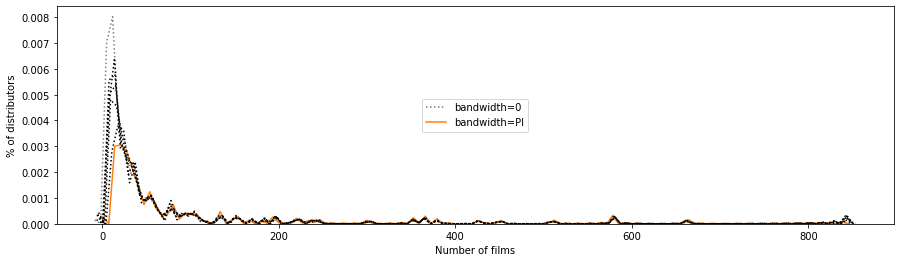

In [9]:
outliers = df['Domestic_Distributor'].value_counts()

f, ax = plt.subplots(figsize=(15, 4))
plt.xlabel('%')
sns.kdeplot( outliers , bw=np.pi, color='tab:gray', linestyle=':' )
sns.kdeplot( outliers , bw=0, color='tab:orange', linestyle='-' )
for bandwidth in range (11,2,-2):
    sns.kdeplot( outliers , bw=np.log(bandwidth), legend=False, color='k', linestyle=':' )
plt.ylabel('% of distributors')
plt.xlabel('Number of films')
plt.legend(['bandwidth=0', 'bandwidth=PI'], loc='center')
plt.title('')


### Distributors by Domestic Total Gross

In [10]:
points = (df.groupby(['Domestic_Distributor'])
            .sum()
            .sort_values(['Domestic_Total_Gross'], ascending=False)
            [['Domestic_Total_Gross']]
         )
points.index

Index(['Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Universal Pictures', 'Twentieth Century Fox', 'Paramount Pictures',
       'Sony Pictures Releasing', 'Lionsgate', 'New Line Cinema',
       'Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures',
       ...
       'KimStim/Zeitgeist Films', 'Kathi Arts', 'Exorcism The Movie, LLC',
       'Blue Llama Studios', 'M Star International', 'Yeah',
       'Seven Arts Distribution', 'Oilrag Productions', 'Lavendar House Films',
       'Phantom Pain Films'],
      dtype='object', name='Domestic_Distributor', length=1082)

No handles with labels found to put in legend.


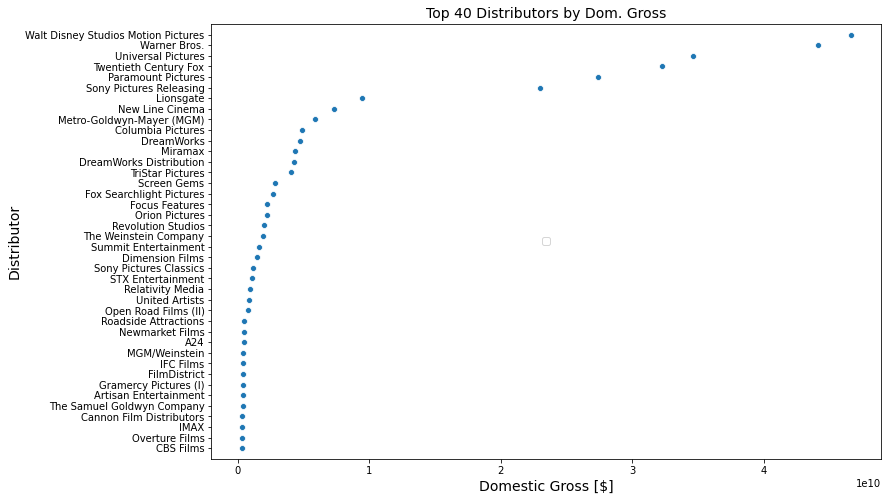

In [11]:
plt.figure(figsize=(12,8))
ploot = sns.scatterplot(data = points, y = points.index[:40], x = points['Domestic_Total_Gross'][:40]);
plt.ylim([-1,40]);ploot.invert_yaxis();plt.legend(loc='center')
plt.ylabel('Distributor', fontsize=14);
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.title('Top 40 Distributors by Dom. Gross', fontsize=14);

plt.savefig('./data/Top40Distrib.svg',format='svg', bbox_inches='tight')

## Domestic Total Gross

In [70]:
df.sort_values(['Domestic_Total_Gross'], ascending=False).reset_index()['Movie_Title'].loc[:10][0]

'Star Wars: Episode VII'

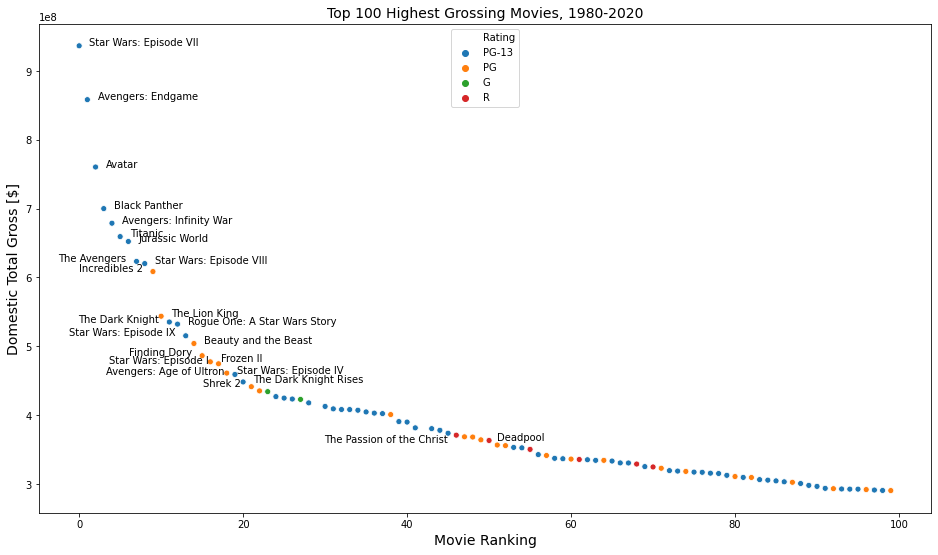

In [174]:
easy_read_subset= (['Movie_Title','Domestic_Distributor','Domestic_Total_Gross','Release_Date',
                    'Runtime','Rating','Budget', 'Director','Cast1'])

sorted_dtg = df.sort_values(['Domestic_Total_Gross'], ascending=False).reset_index()[easy_read_subset][:100]

plt.subplots(figsize=(16,9))
dtg_chart = sns.scatterplot(data = sorted_dtg,
                            x = sorted_dtg.index,
                            y = sorted_dtg['Domestic_Total_Gross'],
                            hue = sorted_dtg['Rating'],)
plt.xlabel('Movie Ranking', fontsize=14); plt.ylabel('Domestic Total Gross [$]', fontsize=14)
plt.legend(loc='upper center')
plt.title('Top 100 Highest Grossing Movies, 1980-2020', fontsize=14)
# Annotations
# top 22 films
for movie in range(0,22):
    align = 'left'
    offset = 1.25
    if (movie > 6) & (movie%2 !=0):
        align = 'right'; offset = -1.25
    else: align = 'left'; offset = 1.25
    dtg_chart.text(x = sorted_dtg.index[movie]+offset,
                  y = sorted_dtg['Domestic_Total_Gross'][movie],
                  s=sorted_dtg['Movie_Title'][movie],
                  horizontalalignment=align, color='black')
# Passion of the Christ
movie=46
dtg_chart.text(x = sorted_dtg.index[movie]-1,
          y = sorted_dtg['Domestic_Total_Gross'][movie]-11e6,
          s=sorted_dtg['Movie_Title'][movie],
          horizontalalignment='right', color='black')
# Deadpool
movie=50
dtg_chart.text(x = sorted_dtg.index[movie]+1,
          y = sorted_dtg['Domestic_Total_Gross'][movie],
          s=sorted_dtg['Movie_Title'][movie],
          horizontalalignment='left', color='black')
plt.savefig('./data/top100movies.svg',format='svg', bbox_inches='tight')

### DTG by film, 1980-2020 unadjusted

In [12]:
df['Domestic_Total_Gross'].describe()

count    1.597300e+04
mean     1.812206e+07
std      4.731340e+07
min      7.200000e+01
25%      5.145600e+04
50%      6.946000e+05
75%      1.419523e+07
max      9.366622e+08
Name: Domestic_Total_Gross, dtype: float64

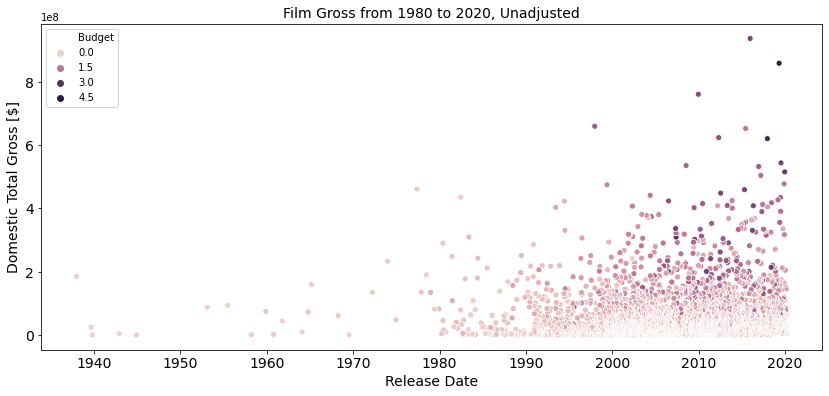

In [188]:
plt.subplots(figsize=(14,6))
plot = sns.scatterplot(data = df, x=df['Release_Date'], y=df['Domestic_Total_Gross'],hue = df['Budget'])
plt.legend(loc='center'); plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.ylabel('Domestic Total Gross [$]', fontsize=14);
plt.xlabel('Release Date', fontsize=14);
plt.title('Film Gross from 1980 to 2020, Unadjusted', fontsize=14);
plt.legend(loc='upper left')
plt.savefig('./data/DTG1980_2020.svg',format='svg')

## Budget

In [14]:
bud=(df.dropna(subset=['Budget'])
       .sort_values(['Budget'], ascending=False)
    )
bud

Movie_Title  \
557                          Avengers: Endgame   
1564                   Star Wars: Episode VIII   
8213  Pirates of the Caribbean: At World's End   
102                      Star Wars: Episode IX   
1237                   Solo: A Star Wars Story   
...                                        ...   
9335                             The Reception   
4179                                  Skinless   
4889                    Midget Zombie Takeover   
9308                         My Date with Drew   
9712                                 Tarnation   

                     Domestic_Distributor  Domestic_Total_Gross  Runtime  \
557   Walt Disney Studios Motion Pictures             858373000    181.0   
1564  Walt Disney Studios Motion Pictures             620181382    152.0   
8213  Walt Disney Studios Motion Pictures             309420425    169.0   
102   Walt Disney Studios Motion Pictures             515202542    142.0   
1237  Walt Disney Studios Motion Pictures             213767512    135.0   
...                                   ...                   ...      ...   
9335                     Strand Releasing                 18389     80.0   
4179                   Phantom Pain Films                   400     80.0   
4889           Driving With Our Eyes Shut                 11006     73.0   
9308            Slowhand Cinema Releasing                181041     90.0   
9712                     Wellspring Media                592014     88.0   

     Rating Release_Date       Budget              Cast1  \
557   PG-13   2019-04-24  356000000.0  Robert Downey Jr.   
1564  PG-13   2017-12-13  317000000.0       Daisy Ridley   
8213  PG-13   2007-05-22  300000000.0        Johnny Depp   
102   PG-13   2019-12-18  275000000.0      Carrie Fisher   
1237  PG-13   2018-05-23  275000000.0   Alden Ehrenreich   
...     ...          ...          ...                ...   
9335    NaN   2005-07-15       5000.0     Maggie Burkwit   
4179    NaN   2014-03-08       2000.0       Allison Egan   
4889    NaN   2013-02-08       2000.0       Kristi McKay   
9308     PG   2005-08-05       1100.0   Brian Herzlinger   
9712    NaN   2004-10-06        220.0  Jonathan Caouette   

                       Cast2               Cast3  ... Writer_Score  \
557              Chris Evans        Mark Ruffalo  ...    18.989706   
1564             John Boyega         Mark Hamill  ...    15.077306   
8213           Orlando Bloom     Keira Knightley  ...    19.713666   
102              Mark Hamill         Adam Driver  ...    19.267376   
1237         Woody Harrelson       Emilia Clarke  ...    15.527125   
...                      ...                 ...  ...          ...   
9335         Chris Burmester  Darien Sills-Evans  ...          NaN   
4179            Dustin Mills         Dave Parker  ...          NaN   
4889  Matt 'Goose' Goosherst    Kedryn Carpenter  ...     9.626910   
9308          Drew Barrymore         John August  ...          NaN   
9712           Renee Leblanc        Adolph Davis  ...          NaN   

     Producer_Score Cinematographer_Score Domestic_Distributor_Score  \
557       19.627254             19.050390                  17.420791   
1564      13.257265             14.361993                  17.379955   
8213      18.347262             17.749305                  17.152817   
102       18.659731             17.948476                  17.438767   
1237      20.092487             13.276003                  17.397654   
...             ...                   ...                        ...   
9335            NaN                   NaN                  11.025922   
4179            NaN                   NaN                        NaN   
4889       9.626910                   NaN                   9.626910   
9308            NaN                   NaN                  13.795115   
9712            NaN                   NaN                  11.360240   

     Cast1_Score  Cast2_Score  Cast3_Score  Cast4_Score    Log_DTG    Log_Bud  
557    17.2766

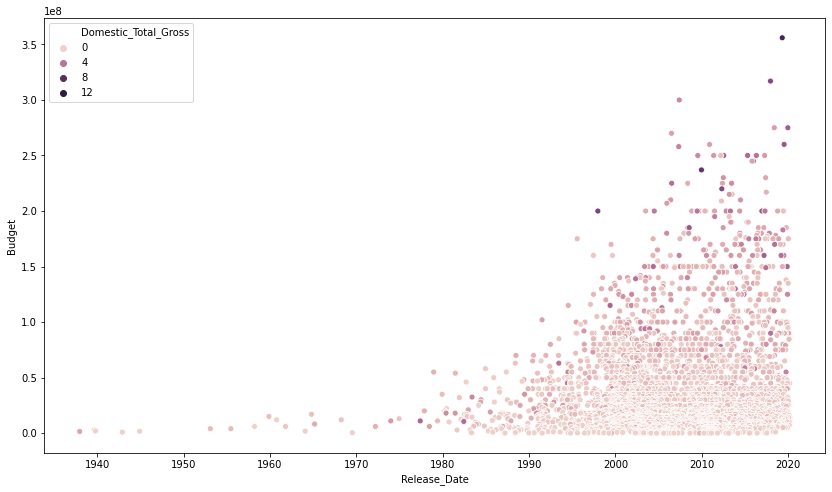

In [15]:
plt.subplots(figsize=(14,8))
plart = sns.scatterplot(data = bud, y=bud.Budget, x=bud.Release_Date, hue= bud.Domestic_Total_Gross)
#sns.scatterplot(data=bud, y = bud.Domestic_Total_Gross, x = bud.Release_Date)

## Runtime vs DTG

In [105]:
sorted_runtime = df[df['Runtime'] < 400].sort_values(['Runtime'], ascending=False).reset_index()[easy_read_subset][:100]
sorted_runtime

df[ (df['Runtime'] > 250) & (df['Rating'] == 'PG') ]


Movie_Title Domestic_Distributor  Domestic_Total_Gross  Runtime Rating  \
13624  Gettysburg      New Line Cinema              10769960    271.0     PG   

      Release_Date  Budget         Cast1         Cast2         Cast3  ...  \
13624   1993-10-08     NaN  Tom Berenger  Martin Sheen  Stephen Lang  ...   

      Writer_Score Producer_Score Cinematographer_Score  \
13624          NaN      13.147057                   NaN   

      Domestic_Distributor_Score Cast1_Score  Cast2_Score  Cast3_Score  \
13624                  15.322567   16.203795    14.091967    17.009309   

       Cast4_Score    Log_DTG  Log_Bud  
13624    15.081806  16.192271      NaN  

[1 rows x 34 columns]

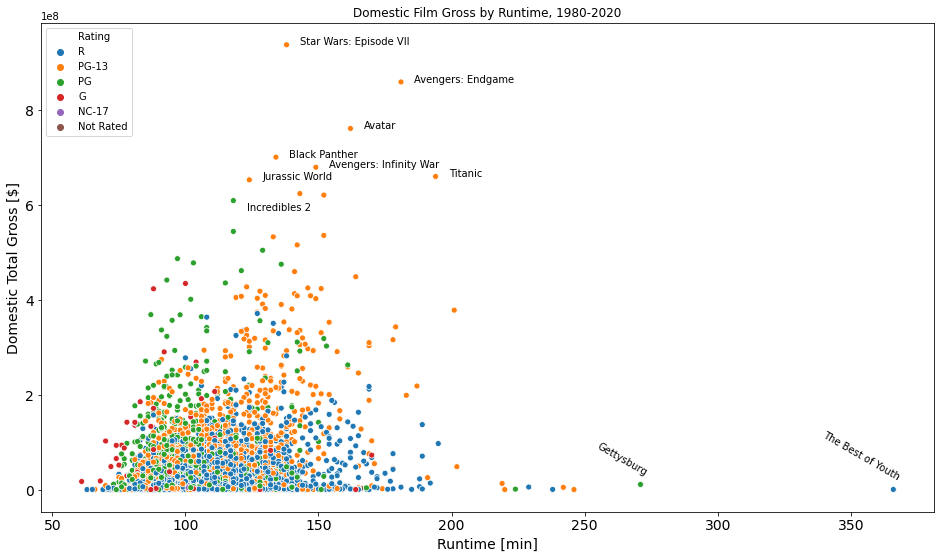

In [187]:

plt.subplots(figsize=(16,9))
dtg_runtime = sns.scatterplot(data=df, x=df['Runtime'], y=df['Domestic_Total_Gross'], hue = df['Rating'])
plt.xticks(fontsize=14); plt.yticks(fontsize=14);
plt.xlabel('Runtime [min]',fontsize=14); plt.ylabel('Domestic Total Gross [$]', fontsize=14);
plt.title('Domestic Film Gross by Runtime, 1980-2020'); plt.legend(loc='upper left')

# top 7 grossing films
for movie in range(0,7):
    dtg_runtime.text(x=sorted_dtg['Runtime'][movie] + 5,
                     y=sorted_dtg['Domestic_Total_Gross'][movie],
                     s=sorted_dtg['Movie_Title'][movie],
                     rotation=0)
# incredibles 2
dtg_runtime.text(x=sorted_dtg['Runtime'][9] + 5,
                 y=sorted_dtg['Domestic_Total_Gross'][9]-20e6,
                 s=sorted_dtg['Movie_Title'][9],
                 rotation=0)

# longest runtime films on the chart
long_movies = ['The Best of Youth','Gettysburg']
for movie_title in long_movies:
    dtg_runtime.text(x=df[df['Movie_Title'] == movie_title]['Runtime'] + 3,
                     y=df[df['Movie_Title'] == movie_title]['Domestic_Total_Gross'] + 20e6,
                     s=movie_title,
                     horizontalalignment='right',
                     rotation = -30)

plt.savefig('./data/GrossbyRuntime.svg',format='svg', bbox_inches='tight')

## average runtime and domestic total gross at each level of Rating

In [17]:
df.Rating.value_counts(dropna=False)

ratings_list = ['R', 'PG-13', 'PG', 'G', 'Not Rated', 'NC-17']

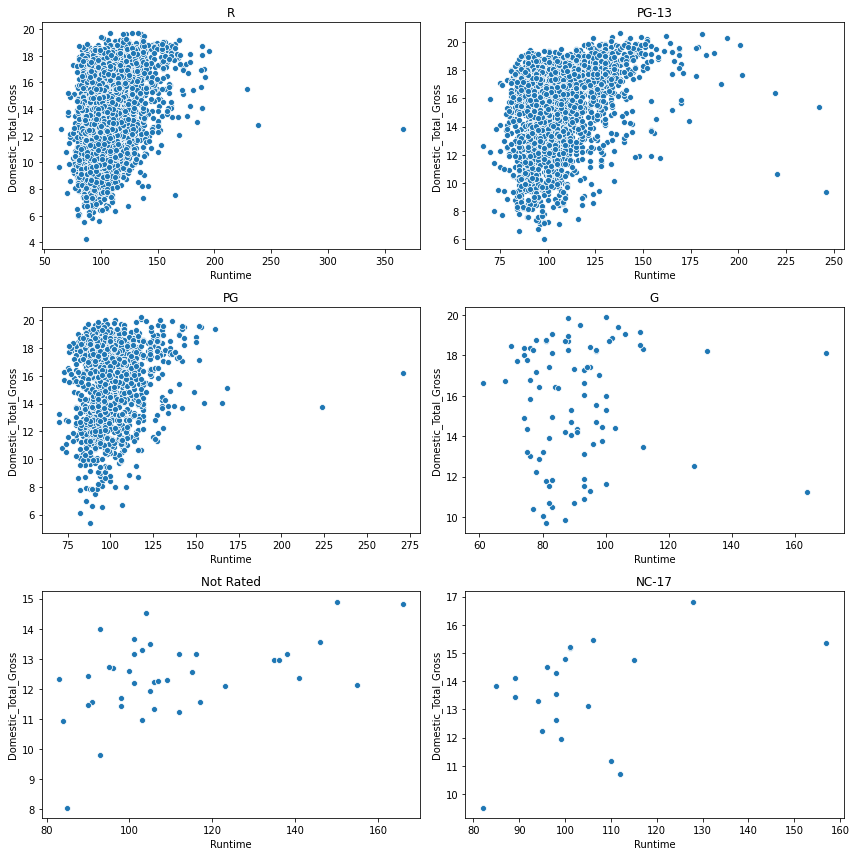

In [18]:
plt.subplots(nrows=3,ncols=2,figsize=(12,12));
for index, rating in enumerate(ratings_list):
    subplot_index = index+1
    plt.subplot(3,2, subplot_index)
    palette = sns.color_palette()
    (sns.scatterplot(data=df[df[rating] == 1],
                     x=df[df[rating] == 1]['Runtime'],
                     y=df[df[rating] == 1]['Domestic_Total_Gross'].apply(lambda x: np.log(x))),
                     )
    plt.title(rating)
    #plt.xticks([0,60,120,180,210,270,330]); plt.ylim([0,6e8]);
    plt.tight_layout()

In [19]:
df[df.Runtime > 250].sort_values(['Domestic_Total_Gross'], ascending=False)

Movie_Title        Domestic_Distributor  \
13624                           Gettysburg             New Line Cinema   
11738                              Dekalog            New Yorker Films   
10465                  The Cremaster Cycle               Palm Pictures   
10119                          LOC: Kargil          Eros International   
1084         DCI 2019: Big, Loud & Live 16               Fathom Events   
10387                    The Best of Youth                     Miramax   
688                          War and Peace                 Janus Films   
6273                                Carlos                   IFC Films   
6670             The Weathered Underground            Indican Pictures   
133                       Wilder vs. Ortiz               Fathom Events   
6264                   Mysteries of Lisbon             Music Box Films   
4254                        Generation War             Music Box Films   
13352                          The Kingdom               October Films   
2966                    River of Fundament  International Film Circuit   
13326                               Tsahal            New Yorker Films   
3016                                 Out 1              Carlotta Films   
6182                                 Shoah                   IFC Films   
8150   Flying: Confessions of a Free Woman            Artistic License   
1389          Eight Hours Don't Make a Day                 Janus Films   
854              L'héritage de la chouette                Icarus Films   
841                    Shoah: Four Sisters           Cohen Media Group   
10376             La Commune (Paris, 1871)                   First Run   
354                                La Flor            Grasshopper Film   
2413             Homeland (Iraq Year Zero)                 Kino Lorber   

       Domestic_Total_Gross  Runtime Rating Release_Date      Budget  \
13624              10769960    271.0     PG   1993-10-08         NaN   
11738                762214    572.0    NaN   2000-06-09         NaN   
10465                665861    398.0    NaN   2003-04-25         NaN   
10119                621103    255.0    NaN   2003-12-25         NaN   
1084                 603320    325.0    NaN   2018-08-09         NaN   
10387                274024    366.0      R   2003-06-20         NaN   
688                  148503    422.0    NaN   2019-02-15         NaN   
6273                 145526    334.0    NaN   2010-10-15  18000000.0   
6670                 140091    310.0    NaN   2010-01-26         NaN   
133                  139207    270.0    NaN   2019-11-23         NaN   
6264                 110507    272.0    NaN   2010-10-21         NaN   
4254                  91595    270.0    NaN   2014-01-15         NaN   
13352                 83381    561.0    NaN   1994-12-21         NaN   
2966                  44840    319.0    NaN   2015-12-04         NaN   
13326                 38773    316.0    NaN   1995-01-27         NaN   
3016                  31539    729.0    NaN   2015-11-06         NaN   
6182                  20175    566.0    NaN   2010-12-10         NaN   
8150                  20157    353.0    NaN   2007-07-04         NaN   
1389                  19987    476.0    NaN   2018-03-16         NaN   
854                   12316    340.0    NaN   2018-11-09         NaN   
841                    7323    273.0    NaN   2018-11-14         NaN   
10376                  5340    345.0    NaN   2003-07-03         NaN   
354                    4032    808.0    NaN   2019-08-09         NaN   
2413                   2491    334.0    NaN   2016-10-06         NaN   

                     Cast1                Cast2                Cast3  ...  \
13624         Tom Berenger         Martin Sheen         Stephen Lang  ...   
11738                  NaN                  NaN                  NaN  ...   
10465       Matthew Barney                  NaN                  NaN  ...   
10119          Sanjay Dutt           Ajay Devgn        Saif Ali Khan  .

## Which director has the highest gross per movie?

### Get dummy vars and counts

In [20]:
pd.DataFrame(pd.get_dummies(data=df['Director'],prefix='Director'))

Director_A. Dean Bell  Director_A. Muthu  Director_A. Raven Cruz  \
0                          0                  0                       0   
1                          0                  0                       0   
2                          0                  0                       0   
3                          0                  0                       0   
4                          0                  0                       0   
...                      ...                ...                     ...   
15968                      0                  0                       0   
15969                      0                  0                       0   
15970                      0                  0                       0   
15971                      0                  0                       0   
15972                      0                  0                       0   

       Director_A.B. Shawky  Director_A.J. Eaton  Director_A.J. Edwards  \
0                         0                    0                      0   
1                         0                    0                      0   
2                         0                    0                      0   
3                         0                    0                      0   
4                         0                    0                      0   
...                     ...                  ...                    ...   
15968                     0                    0                      0   
15969                     0                    0                      0   
15970                     0                    0                      0   
15971                     0                    0                      0   
15972                     0                    0                      0   

       Director_A.L. Vijay  Director_A.M. Lukas  Director_A.R. Murugadoss  \
0                        0                    0                         0   
1                        0                    0                         0   
2                        0                    0                         0   
3                        0                    0                         0   
4                        0                    0                         0   
...                    ...                  ...                       ...   
15968                    0                    0                         0   
15969                    0                    0                         0   
15970                    0                    0                         0   
15971                    0                    0                         0   
15972                    0                    0                         0   

       Director_A.T. White  ...  Director_Åke Sandgren  \
0                        0  ...                      0   
1                        0  ...                      0   
2                        0  ...                      0   
3                        0  ...                      0   
4                        0  ...                      0   
...                    ...  ...                    ...   
15968                    0  ...                      0   
15969                    0  ...                      0   
15970                    0  ...                      0   
15971                    0  ...                      0   
15972                    0  ...                      0   

       Director_Édouard Molinaro  Director_Élie Chouraqui  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
15968                          0                        0   
15969                          0                        0   
15970                          0  

In [21]:
director_counts = df.Director.value_counts().reset_index()
director_counts.columns = ['Director','Film_Count']
director_counts

Director  Film_Count
0             Woody Allen          39
1          Clint Eastwood          32
2        Steven Spielberg          28
3       Steven Soderbergh          26
4              Ron Howard          26
...                   ...         ...
7783  Richard Friedenberg           1
7784          Barney Clay           1
7785           Chip Baker           1
7786      John Alan Simon           1
7787            Paul Dano           1

[7788 rows x 2 columns]

### Directors by movie count: 

TODO: split list by movies > 1 and movies <= 1

ValueError: A wide-form input must have only numeric values.

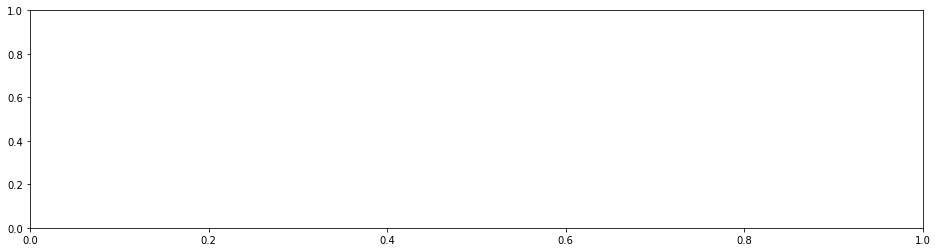

In [175]:
plt.subplots(figsize=(16,4))
plat = sns.scatterplot(data=director_counts[:100],);
plt.xticks(rotation=90);

### Directors by movie gross

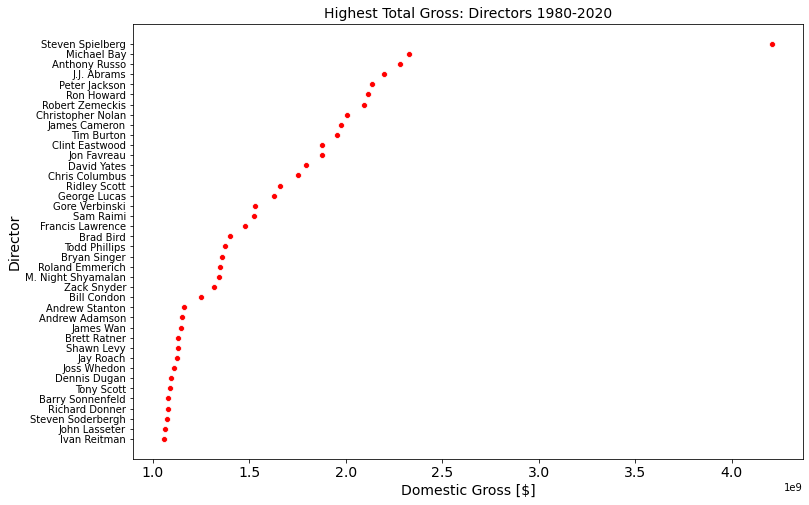

In [134]:
d_gross_mean=(df.groupby(['Director'])['Domestic_Total_Gross']
               .sum()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
#d_gross_mean['Domestic_Total_Gross'] = d_gross_mean['Domestic_Total_Gross'].apply(lambda x: np.log(x))
#d_gross_mean
plt.subplots(figsize=(12,8))
plat = sns.scatterplot(data=d_gross_mean[:40],y=d_gross_mean[:40]['Director'],x=d_gross_mean[:40]['Domestic_Total_Gross'], color = 'r');
plat.invert_yaxis();
plt.xticks(fontsize=14)
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.ylabel('Director', fontsize=14);
plt.title('Highest Total Gross: Directors 1980-2020', fontsize=14)
plt.savefig('./data/HighestGrossDirectors.svg',format='svg', bbox_inches='tight')

### find an equation for the director curve

# Cast by score

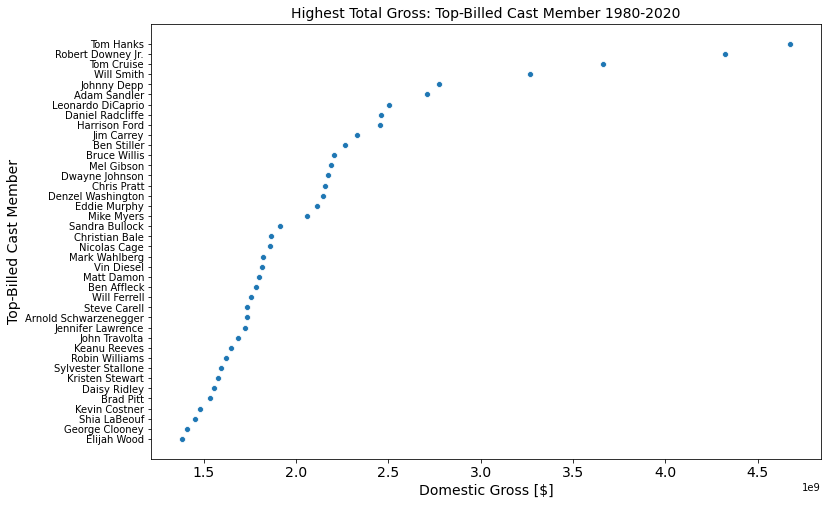

In [127]:
c_gross_mean=(df.groupby(['Cast1'])['Domestic_Total_Gross']
               .sum()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
plt.subplots(figsize=(12,8))
plat = sns.scatterplot(data=c_gross_mean[:40],y=c_gross_mean[:40]['Cast1'],x=c_gross_mean[:40]['Domestic_Total_Gross']);
plat.invert_yaxis();
plt.xticks(fontsize=14)
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.ylabel('Top-Billed Cast Member', fontsize=14);
plt.title('Highest Total Gross: Top-Billed Cast Member 1980-2020', fontsize=14)
plt.savefig('./data/HighestGrossCast1.svg',format='svg', bbox_inches='tight')

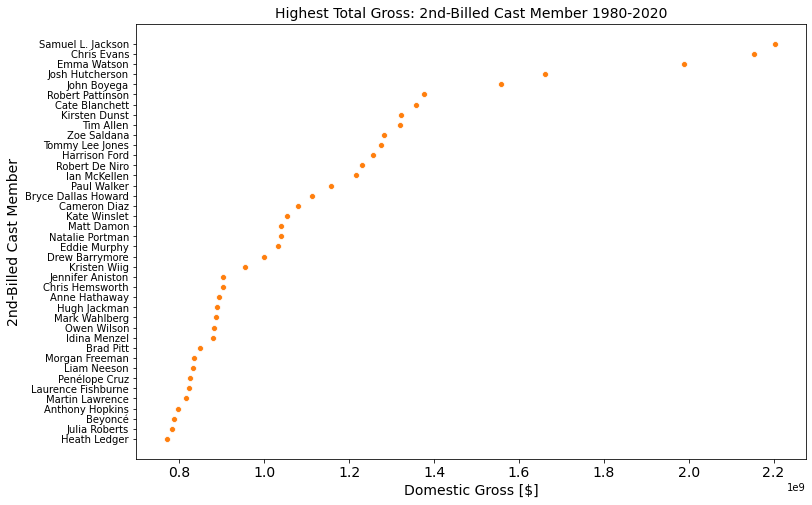

In [131]:
c_gross_mean=(df.groupby(['Cast2'])['Domestic_Total_Gross']
               .sum()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
plt.subplots(figsize=(12,8))
plat = sns.scatterplot(data=c_gross_mean[:40],y=c_gross_mean[:40]['Cast2'],x=c_gross_mean[:40]['Domestic_Total_Gross'],color = 'tab:orange');
plat.invert_yaxis();
plt.xticks(fontsize=14)
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.ylabel('2nd-Billed Cast Member', fontsize=14);
plt.title('Highest Total Gross: 2nd-Billed Cast Member 1980-2020', fontsize=14)
plt.savefig('./data/HighestGrossCast2.svg',format='svg', bbox_inches='tight')

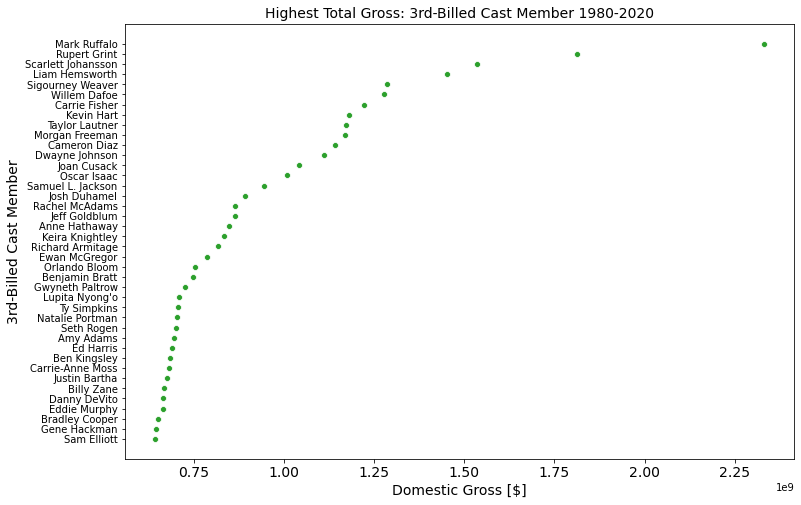

In [132]:
c_gross_mean=(df.groupby(['Cast3'])['Domestic_Total_Gross']
               .sum()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
plt.subplots(figsize=(12,8))
plat = sns.scatterplot(data=c_gross_mean[:40],y=c_gross_mean[:40]['Cast3'],x=c_gross_mean[:40]['Domestic_Total_Gross'], color='tab:green');
plat.invert_yaxis();
plt.xticks(fontsize=14)
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.ylabel('3rd-Billed Cast Member', fontsize=14);
plt.title('Highest Total Gross: 3rd-Billed Cast Member 1980-2020', fontsize=14)
plt.savefig('./data/HighestGrossCast3.svg',format='svg', bbox_inches='tight')

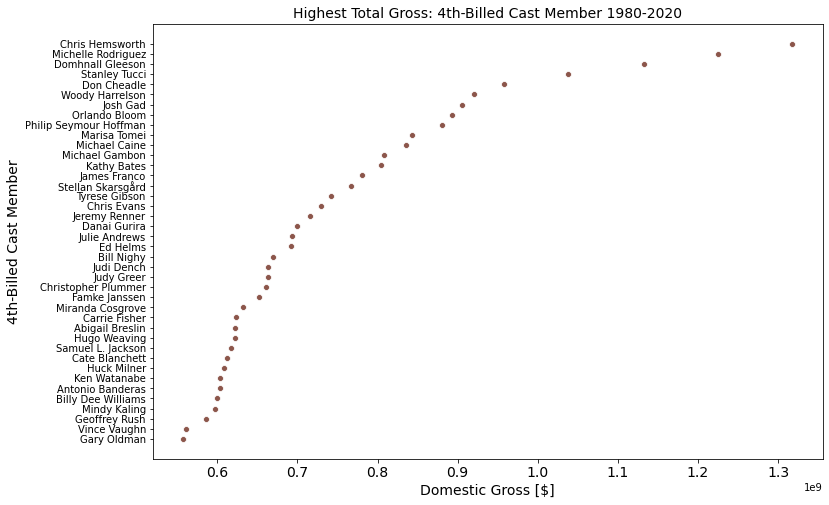

In [133]:
c_gross_mean=(df.groupby(['Cast4'])['Domestic_Total_Gross']
               .sum()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
plt.subplots(figsize=(12,8))
plat = sns.scatterplot(data=c_gross_mean[:40],y=c_gross_mean[:40]['Cast4'],x=c_gross_mean[:40]['Domestic_Total_Gross'], color = 'tab:brown');
plat.invert_yaxis();
plt.xticks(fontsize=14)
plt.xlabel('Domestic Gross [$]', fontsize=14);
plt.ylabel('4th-Billed Cast Member', fontsize=14);
plt.title('Highest Total Gross: 4th-Billed Cast Member 1980-2020', fontsize=14)
plt.savefig('./data/HighestGrossCast4.svg',format='svg', bbox_inches='tight')

# Remove outliers

In [ ]:
from scipy import stats

## DTG

In [ ]:
sns.distplot(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.xlabel('Log DTG', fontsize=14); plt.ylabel('P (Log DTG)', fontsize=14)
plt.title('Bimodal Distribution of ln(Domestic Gross)', fontsize=14)
plt.savefig('./data/bimodalLogDTG.svg',format='svg')

THIS IS A BIMODAL DISTRIBUTION!

In [ ]:
kernel = stats.gaussian_kde(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)))
positions = np.arange(2.5, 22.5, 0.00125)
Z = np.reshape(kernel.evaluate(positions).T, (16000,))

In [ ]:
sns.distplot(df['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.plot(positions,Z, color='r')